## Задача 1

ДЗ Умаров Рустамбека

Мне показалось, что было бы интересно посмотреть на графики на примере работы ЦПТ, поскольку на курсе майнора мы проходили ЦПТ, я решил написать алгоритм для цпт в случае распределения Парето. Для этого не понадобились данные, но все равно, мне кажется, что это интересно. Но на этом, конечно, все графики не заканчиваются, далее я нарисую еще какие-нибудь, но уже по данным, Планирую взять какую-нибудь статитстику по продажам с яндекс-маркета

In [66]:
import math as math
import scipy as sp
from scipy import stats
from scipy.stats import rayleigh

%matplotlib inline

import timeit as t
from pylab import *
from sklearn import svm
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from pandas import read_csv, DataFrame
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import ml_metrics, string, re, pylab as pl
import random
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
warnings.filterwarnings('ignore')

def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

ImportError: No module named 'ml_metrics'

In [2]:
b = 12
dist = sts.pareto(b=b)
sample = dist.rvs(100)

In [3]:
Xm = 1
if b<=1:
    E = math.inf
elif b>1:
    E = (b*Xm)/(b-1)
print('E(X) =', E)

Xm = 1
if b>1 and b <= 2:
    D = math.inf
elif b>2:
    D = (b*(Xm**2))/(((b-1)**2)*(b-2))
print('D =', D)

E(X) = 1.0909090909090908
D = 0.009917355371900827


5 выборок: mean=1.09095961575, max=1.01273145351, min=1.34683691936
50 выборок: mean=1.09091476173, max=1.05341244169, min=1.14459878896
100 выборок: mean=1.09069257507, max=1.06227697622, min=1.12442075614
200 выборок: mean=1.09081879551, max=1.07110595847, min=1.1167947383


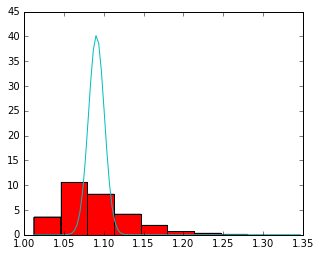

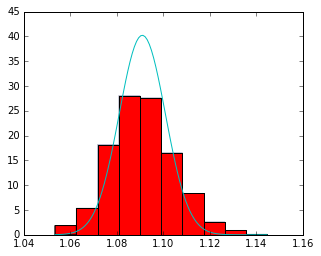

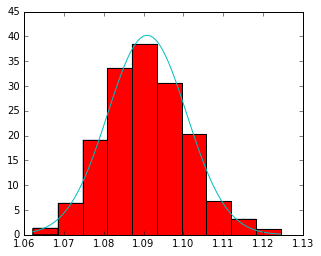

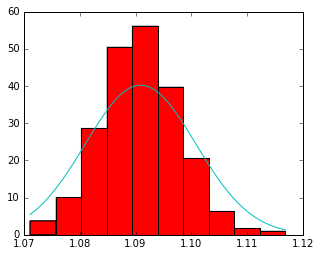

In [6]:
x = np.linspace(1,2,100)
n = [5, 50, 100, 200]

for i in n:
    plt.figure(figsize=(5,4))
    means = [np.mean(dist.rvs(i)) for x in list(range(1000))]
    mean = E
    std = math.sqrt(D)
    norm = sts.norm(loc=mean, scale=std**2)
    print('%s выборок: mean=%s, max=%s, min=%s' 
          %(i, np.mean(means), np.min(means), np.max(means)))
    plt.hist(means, normed=True, histtype='stepfilled', alpha=0.2)
    x_min = np.min(plt.hist(means, normed=True)[1])
    x_max = np.max(plt.hist(means, normed=True)[1])
    x = np.linspace(x_min, x_max, 100)
    plt.plot(x, norm.pdf(x))

как я и написал выше, это

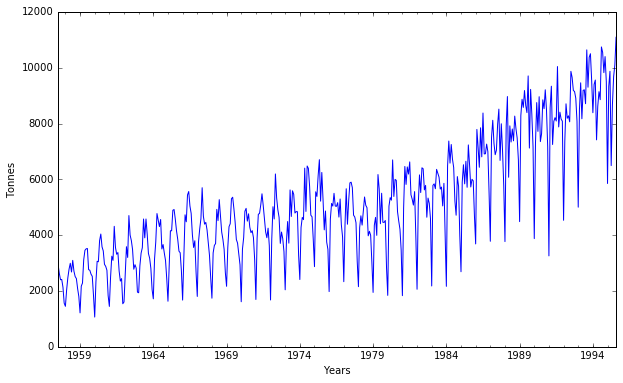

In [14]:
production = pd.read_csv('monthly-production-of-chocolate.csv',
                   index_col=['Month'], parse_dates=['Month'], dayfirst=True)
production.rename(columns={'Monthly production of chocolate confectionery in Australia: tonnes. July 1957 ? Aug 1995': 'production_num'}, 
                  inplace=True)

figsize(10,6)
production.production_num.plot()
plt.ylabel('Tonnes')
plt.xlabel('Years')
pylab.show()

Нашел с сайт с кучей разных данных о продажах, вот тут довольно интересно, это продажи шоколада в австралии, ведь все любят шоколад. Будь я трейдером, то сказал бы, что это восходящий тренд.

In [20]:
data = pd.read_csv('titanium.csv')
data.head()

,x,y
0,585,0.644
1,595,0.622
2,605,0.638
3,615,0.649
4,625,0.652


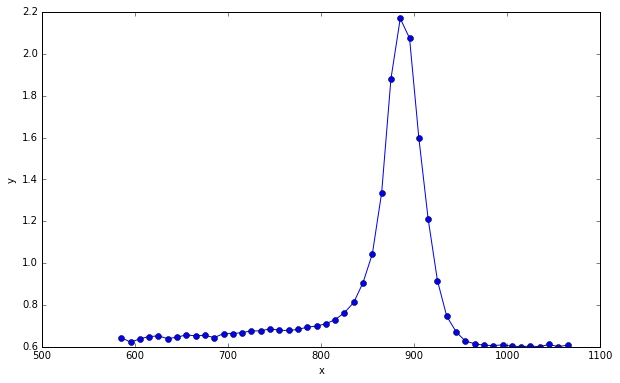

In [18]:
plt.figure(figsize=(10,6))
plt.plot(data['x'], data['y'],'b-o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Как мы увидели по новым данным, это просто координаты (x y), выведем их

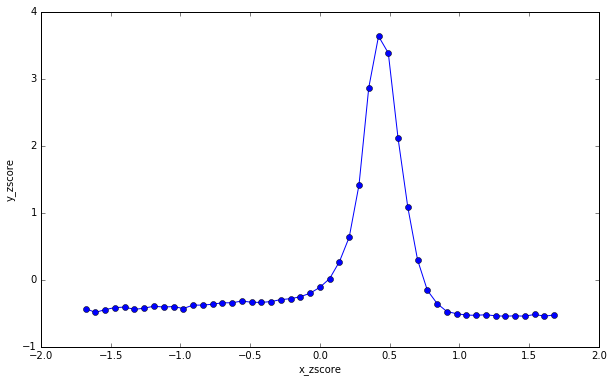

In [17]:
cols = list(data.columns)
for x in cols:
    col_zscore = 'x' + '_zscore'
    data[col_zscore] = (data['x'] - data['x'].mean())/data['x'].std()
for y in cols:
    col_zscore = 'y' + '_zscore'
    data[col_zscore] = (data['y'] - data['y'].mean())/data['y'].std()

plt.figure(figsize=(10,6))
plt.plot(data['x_zscore'], data['y_zscore'],'b-o')
plt.xlabel('x_zscore')
plt.ylabel('y_zscore')
plt.show()

Здесь мы нормализовали данные, чтобы строился более красивый график

In [29]:
def generate_data(n, se, x_min, x_max):
    '''
    Функция возвращает зашумленные знаения sin(x) 
    в n точках равномерного разбиения [x_min, x_max)
    '''
    xx = np.linspace(x_min, x_max, n)
    yy = np.sin(xx) + se * np.random.randn(n)
    return xx.reshape(-1, 1), yy

N = 30
se = 0.5
x_min = 0
x_max = 2 * np.pi

X, y = generate_data(N, se, x_min, x_max)

In [30]:
def polynomial_features(x, d):
    a = []
    N = len(x)
    for j in range(N):
        for i in range(1,d+1):
            a.append(x[j]**i)
    c = np.array(a)
    b = c.reshape(N,d)
    return b

x =[2,3,4]
d = 4
print (polynomial_features(x, d))

[[  2   4   8  16]
 [  3   9  27  81]
 [  4  16  64 256]]


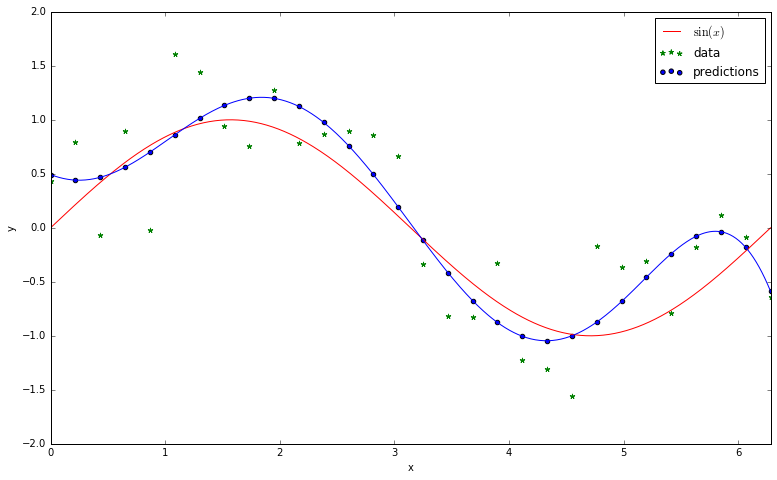

In [38]:
import sklearn.linear_model as lm

lr = lm.LinearRegression()

kirus = polynomial_features(X, 7)

lr = lr.fit(kirus, y)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
xx = np.linspace(0, 2 * np.pi, 500)
ax.plot(xx, np.sin(xx), c = 'r', label = '$\sin(x)$')
ax.scatter(X, y, c = 'g', marker = (5,2), label = 'data')

ax.scatter(X, lr.predict(kirus.reshape(-1, 7)), label = 'predictions')

z = polynomial_features(xx.reshape(-1,1), 7)



ax.plot(xx,
        lr.predict(z.reshape(-1, 7)),)

ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel('x')
ax.set_ylabel('y')                          
ax.legend();

Тут я решил по случайно-сгенерированным точкам построить зависимость, которой является полином степени 7, либо синусойда. красным цветом - синусойда, синим - полином. 

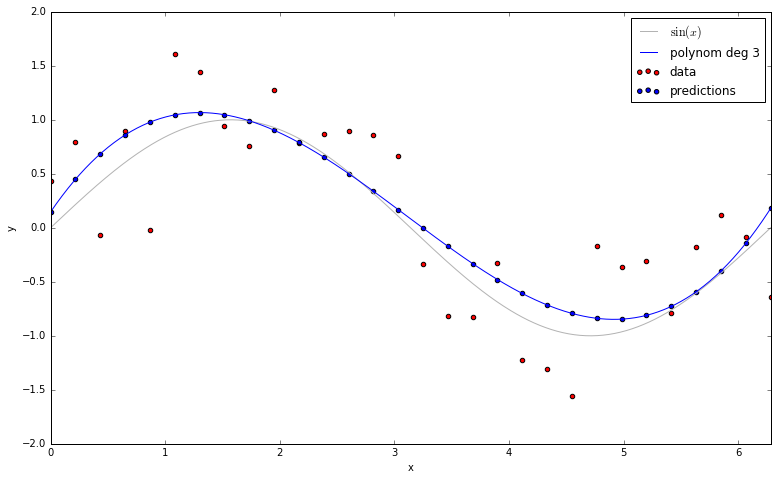

In [32]:
def choose_d(X, y, n):
    mas = np.array([])    #sozdaem massiv     
    lr = lm.LinearRegression()   
    for i in range(1,n+1):  # цикл
        kirus = polynomial_features(X, d = i)  #
        ls = lr.fit(kirus, y)  #koro4e - syper
        res = ls.predict(kirus.reshape(-1, i))  
        pogr = 0
        for j in range(0,X.size):
            pogr += (np.sin(X[j])-res[j])**2
            
        mas = np.insert(mas,mas.size,pogr)
    return np.argmin(mas)+1
    
    pass


powopt = choose_d(X,y,10)           

lr = lm.LinearRegression()
# функция  fit принимает в качестве параметров матрицу признаков обучающей выборки X и набор целевых значений y

x_new = polynomial_features(X, d = powopt)
lr = lr.fit(x_new, y)
# в переменной lr.intercept_ хранится значение свободного члена регрессии
# а в lr.coef_ хранится значение коэффициентов при признаках
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
xx = np.linspace(0, 2 * np.pi, 500)
ax.plot(xx, np.sin(xx), c = (0.7, 0.7, 0.7), label = '$\sin(x)$')
ax.scatter(X, y, c = 'r', label = 'data')
ax.scatter(X, lr.predict(x_new.reshape(-1, powopt)), label = 'predictions')
ax.plot(xx,
        lr.predict(polynomial_features(xx.reshape(-1,1),powopt).reshape(-1,powopt)),
           label = ('polynom deg ' + str(powopt)))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend();

Здесь у нас тоже самое, только здесь полином степени 3, решил сюда же поместить и синусойду, чтобы показать, как они похожи.

Если посчитать синусойду отдельным графиком, то у нас всего 10 графиков на разную тематику.

## Задача 2

In [86]:
E=0.5
D=1/12

In [87]:
mas = []
for i in range(50):
    mas.append([])
    
for i in range(50):
    mas[i]=np.random.uniform(0, 1, 1000)

In [88]:
mas3=[]
k=0
for i in range(1000):
    k = mas[0][i]+mas[1][i]+mas[2][i]
    mas3.append(k)
    k=0

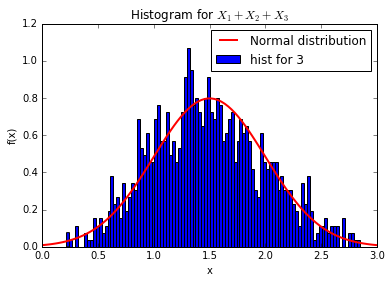

In [114]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(0, 3, 100)

values = plt.hist(mas3, normed=True, bins=100, label='hist for 3')

function = (1/(sqrt(D*3)*sqrt(2*pi)))*exp(-(x-3*E)*(x-3*E)/(2*(D*3)))
plt.plot(x, function, 'r-', lw=2, label='Normal distribution')

plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('Histogram for $X_1+X_2+X_3$')

plt.legend(loc='best')

In [98]:
k=0
for i in range(1000):
    if mas3[i]>2:
        k=k+1
p = k/1000
print('p =',probability)

p = 0.168


E(X1^5)=1/6, просто интеграл от X1^5 равен 1/6

In [101]:
Enew=0
for j in range(1000):
    Enew=Enew+pow(mas[0][j],5)/1000
print('E(X^5)',Enew)

E(X^5) 0.161422640168


С дисперсией сделаем по-хитрому, но у нас будет только приблеженный вариант. Мы сделаем выборку. вот у нас есть 2 наших массива Х1 и Х2, ну и согласному тому выражению мы сделаем новый массив, который будет содеражать новую выборку, а по этой выборке мы посчитаем дисперсию, сперва посчитав мат ожидание.

In [105]:
masnew =[]
for j in range(1000):
    c=mas[0][j]/(1+pow(mas[1][j],2))
    masnew.append(c)
    c=0
    

Evar=0
for j in range(1000):
    Evar = Evar + masnew[j]
Evar=Evar/1000

var=0
for j in range(1000):
    var=var+(masnew[j]-Evar)**2
var=var/999
print('var(X1/(1+X2^2)) приближенно',var)

var(X1/(1+X2^2)) приближенно 0.0606535832497


Здесь мы поступим аналогичным образом, соберем новый массив для (1+X1)/(3+X2), для удобства вычисления медианы возьмем вместо 1000 - 999, а поскольку питон считает подобно французам (у них натуральные числа с 0 начинаются), то нужное нам число - 499, тоже самое с квантилем 25%

In [113]:
massiv=[]
a=0
for j in range(999):
    a=(1+mas[0][j])/(3+mas[1][j])
    massiv.append(a)
    a=0
massiv.sort()

M = massiv[499]
print('M приблизительно',M)

K = massiv[249]
print('25% квантиль приблизительно',K)

M приблизительно 0.427501074777
25% квантиль приблизительно 0.360966727951


Подведем итог по 2 заданию. Не сделал распределение для 10 и 50 случайных величин. для 1 приведу ниже.

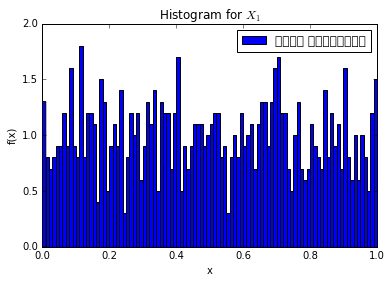

In [123]:
fig, ax = plt.subplots(1, 1)

# строим график функции плотности и гистограмму распределений
x = np.linspace(0, 1, 100)
bins = plt.hist(mas[0], 100, normed=True, label='наши значения')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('Histogram for $X_1$')

plt.legend(loc='best')

как мы видем - на русском языке лейбл не ставится, ну ничего, так как f(x)=1 - функция плотности распределения. гистограмма похожа на правду

## Задача 3

# Задача о сумасшедшей старушке

Поскольку с группой я посещаю только тервер, а также совсем с ними не общаюсь и не пересекаюсь, я взял на себя смелость решать 1 задачу. Надеюсь, что никто ее не решал

1) Вероятность того, что последний пассажир сел на свое место равна 1/2

Будем решать эту задачу по ММИ (методу математической индукции)

сперва немного пояснения. первым пассажиром мы называем того, что садится первым после того, как села старушка, соответственно к-ого, мы называем к-ым. k у нас от 1 до 99

1.Предположение индукции: Р(к-ый пассажир не сел на свое место)=1/(100-k+1)

2.База индукции: Р(1 пассажир сел не на свое место) = Р (бабка села на его место) = 1/100 так как мест всего 100, а за первым пассажиром фиксировано первое место.

3.Шаг индукции. Пусть для к-ого пассажира предположение индукции верно, тогда докажем для к+1.

P(k+1-ый не сел на свое место)=P(бабка села на его место или 1-ый сел на его место или 2-ой сел на его место или ... или к-ый сел на его место) = 1/100(бабка села на его место)+1/100*1/99(бабка села на место 1, а 1 на место к+1) +1/100*1/98(бабка села на место 2, а 2 на место к+1)+1/100*1/99*1/98(бабка-1-2-к+1)+...(всевозможные групповые произведения 1/i, для i от 100-k+1 до 99 и умноженные на 100). докажем, что эта сумма сварачивается в 1/(100-k+1)

1/100 вынесем. останется сумма (1+1/99+1/98+...+1/(100-k+1)+1/99*1/98+1/99*1/97...+1/98*1/97*1/96+..) где с 1 множителем означает что пассажир садился сразу на место к+1,  двумя, что первый на место второго, а второй на место к+1 и так далее)

здесь всё очень просто. многократным применением свойства 1/i(i+d)=1/d(1/i-1/(i+d))

для 1, 2 и 3 легко проверяется вручную